In [1]:
import os
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

DATA_PATH = '/workspaces/Tracking-Gazes-on-Museum-Pieces-Data-Plus/data'

def concat_df(DATA_PATH):
    df = pd.DataFrame()
    for folder in os.listdir(DATA_PATH):
        if not os.path.isdir(os.path.join(DATA_PATH, folder)):
            continue
        temp_path = os.path.join(DATA_PATH, folder, 'gaze.csv')
        temp_df = pd.read_csv(temp_path)
        temp_df['folder_id'] = folder
        df = pd.concat([df, temp_df])
    return df

demographic_data = pd.read_excel(os.path.join(DATA_PATH, 'demographic.xlsx'))
gaze_df = concat_df(DATA_PATH)

print('Participant count', gaze_df['section id'].nunique())
gaze_df = pd.merge(demographic_data, gaze_df, left_on='codice_eyetr_museo', right_on='folder_id', how='right')
gaze_df.replace({'m': 0, 'f': 1}, inplace=True)
print('Row count', gaze_df.shape[0])
print('Participant count', gaze_df['section id'].nunique())
print('Participant count', gaze_df['codice_eyetr_museo'].nunique())
display(gaze_df.head())

Participant count 15
Row count 189414
Participant count 15
Participant count 15


,School or degree course,Age,Educational Qualification,sesso,codice_eeg_lab,codice_eyetr_lab,codce_eeg_museo,codice_eyetr_museo,Unnamed: 10,vts,section id,recording id,timestamp [ns],gaze x [px],gaze y [px],worn,fixation id,blink id,folder_id
0,filologia,46,laurea magistrale,0,NaN,NaN,2022_24am,2022_24bm,NaN,NaN,b039bef1-92a5-45d2-a73e-05e1758c0c8c,90bcfb34-bdf6-4f33-82e1-f0a94bd0d6b4,1649775196704687470,649.461,340.887,1.0,NaN,NaN,2022_24bm
1,filologia,46,laurea magistrale,0,NaN,NaN,2022_24am,2022_24bm,NaN,NaN,b039bef1-92a5-45d2-a73e-05e1758c0c8c,90bcfb34-bdf6-4f33-82e1-f0a94bd0d6b4,1649775196708704470,649.682,346.563,1.0,NaN,NaN,2022_24bm
2,filologia,46,laurea magistrale,0,NaN,NaN,2022_24am,2022_24bm,NaN,NaN,b039bef1-92a5-45d2-a73e-05e1758c0c8c,90bcfb34-bdf6-4f33-82e1-f0a94bd0d6b4,1649775196712663470,649.030,346.605,1.0,NaN,NaN,2022_24bm
3,filologia,46,laurea magistrale,0,NaN,NaN,2022_24am,2022_24bm,NaN,NaN,b039bef1-92a5-45d2-a73e-05e1758c0c8c,90bcfb34-bdf6-4f33-82e1-f0a94bd0d6b4,1649775196716686470,625.863,353.154,1.0,NaN,NaN,2022_24bm
4,filologia,46,laurea magistrale,0,NaN,NaN,2022_24am,2022_24bm,NaN,NaN,b039bef1-92a5-45d2-a73e-05e1758c0c8c,90bcfb34-bdf6-4f33-82e1-f0a94bd0d6b4,1649775196724693470,628.950,364.969,1.0,NaN,NaN,2022_24bm


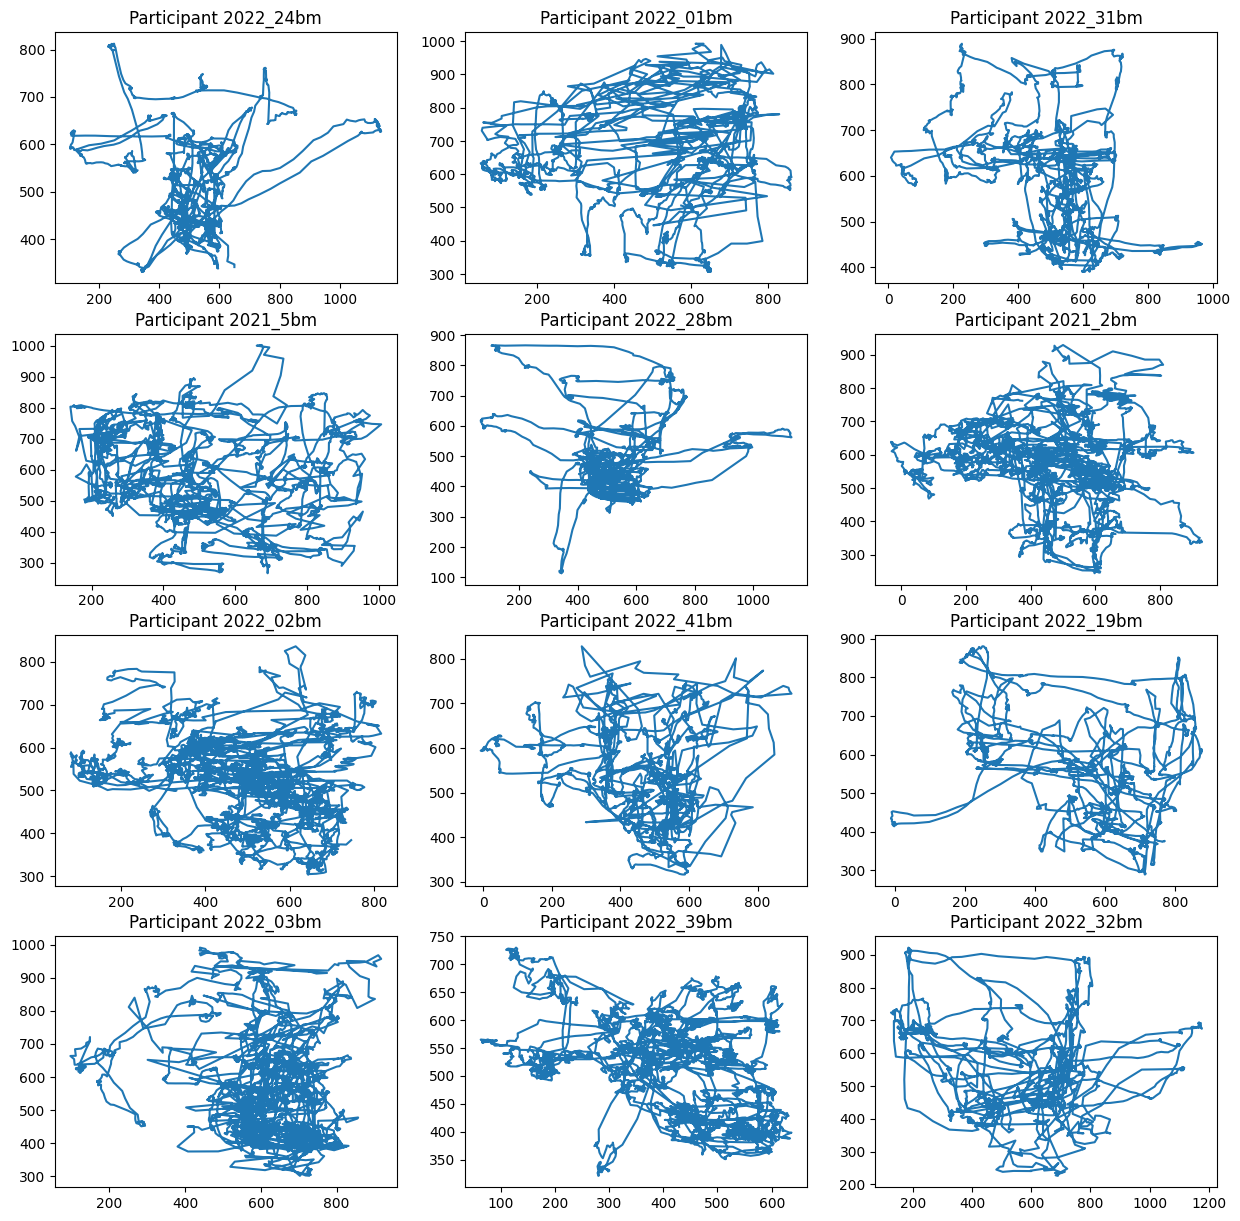

In [2]:
ncols = 3
nrows = 4
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15, 15),)
current_col = 0
persons_list = list(gaze_df['folder_id'].unique())
for current_col in range(ncols):
    for current_row in range(nrows):
        current_person = persons_list[nrows*current_col + current_row]
        temp = gaze_df[gaze_df['folder_id'] == current_person]
        axs[current_row, current_col].plot(temp['gaze x [px]'], temp['gaze y [px]'])
        axs[current_row, current_col].set_title(f"Participant {current_person}")

plt.show()

#### Apply data smoothing

In [ ]:
def resample_freq(df):
    x = signal.resample(df['gaze x [px]'], 3000)
    y = signal.resample(df['gaze y [px]'], 3000)

resampled_df = df.groupby('section id')

ncols = 3
nrows = 4
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15, 15),)
current_col = 0
persons_list = list(gaze_df['folder_id'].unique())
for current_col in range(ncols):
    for current_row in range(nrows):
        current_person = persons_list[nrows*current_col + current_row]
        temp = gaze_df[gaze_df['folder_id'] == current_person]
        axs[current_row, current_col].plot(temp['gaze x [px]'], temp['gaze y [px]'])
        axs[current_row, current_col].set_title(f"Participant {current_person}")

plt.show()